In [180]:
import sys
if not '../..' in sys.path:
    sys.path.append('../..')    
from analysis import collection, analysis, emg, plot
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd
import scipy as sp
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from joblib import dump, load
import pickle

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'axes.labelsize': 16})
mpl.rcParams.update({'figure.figsize': (16*0.8,9*0.8)})
mpl.rcParams.update({'axes.facecolor': "white"})
mpl.rcParams.update({'lines.marker': "+"})
mpl.rcParams.update({'lines.linestyle': ""})
mpl.rcParams.update({"axes.spines.left":   True})
mpl.rcParams.update({"axes.spines.bottom": True})
mpl.rcParams.update({"axes.spines.top":    False})
mpl.rcParams.update({"axes.spines.right":  False})

image_path = Path("/Users/spencer/phd/phd/images/basic_results/form_response")

%matplotlib inline

In [44]:
with open('../olympics_subjects.pkl', 'rb') as handle:
    subjects = pickle.load(handle)

In [45]:
for i, subject in enumerate(subjects):
    if subject.name == "georgia":
        print(i)

16


In [46]:
hit_fractions = []
for subject in subjects:
    hits = 0
    trials = 0
    for s in subject.tasks["center_hold"].sorted_sessions():
        for t in s.sorted_trials():
            trials += 1
            if t.outcome == "Hit":
                hits += 1
    hit_fractions.append(hits/trials)

In [47]:
form_responses = pd.read_csv("~/motor-control/data/csv/form_responses.csv",parse_dates=["timestamp"])

In [48]:
trajectory_df = pd.read_pickle("../trajectory_dataframe.pkl")

In [49]:
trajectory_df

0         1    reward
subject block target time                              
0       0     1      0     0.343222 -0.082905  0.661990
                     1     0.358024 -0.070899  0.645879
                     2     0.373063 -0.057852  0.629600
                     3     0.388132 -0.044123  0.613457
                     4     0.403032 -0.030089  0.597726
...                             ...       ...       ...
45      44    12     154   0.693029 -0.405245  0.200742
                     155   0.729362 -0.416387  0.163617
                     156   0.762247 -0.424639  0.131491
                     157   0.791030 -0.430207  0.105391
                     158   0.815206 -0.433338  0.086291

[7820997 rows x 3 columns]

In [50]:
subject_rewards = 1 / trajectory_df.groupby(level=['subject']).mean()["reward"]

In [51]:
# highest reward, hit fraction
subjects[subject_rewards.argmax()].name, subjects[np.argmax(hit_fractions)].name

('morio', 'morio')

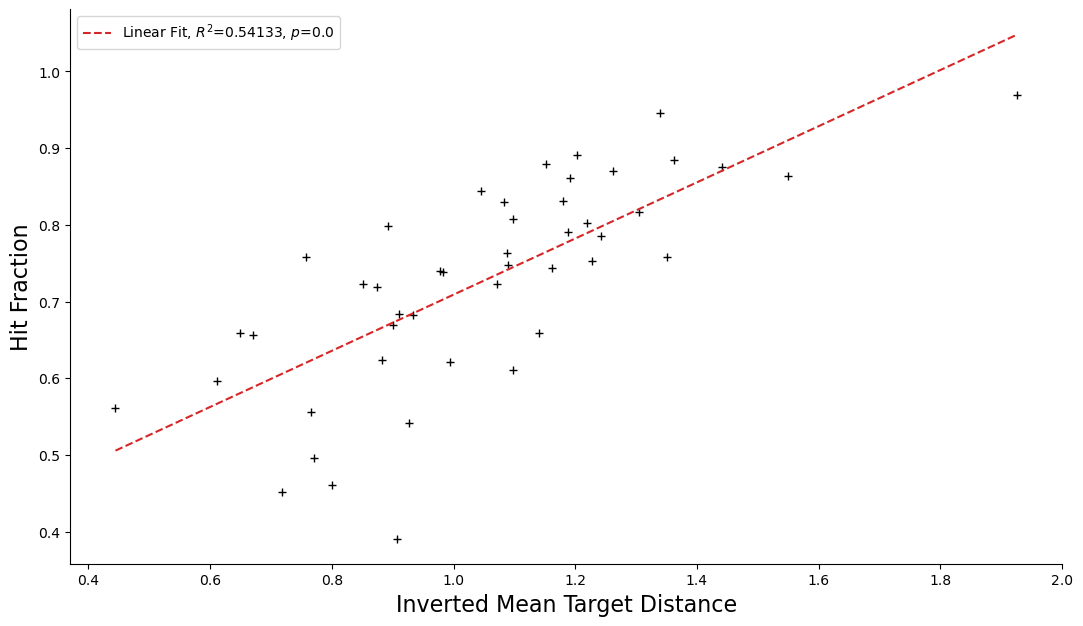

In [96]:
plt.plot(subject_rewards, hit_fractions,"k")
r = analysis.linear_fit(subject_rewards, hit_fractions)
x = analysis.linspace(subject_rewards)
plot.plot_linear_fit(x,r,plt.gca())
plt.xlabel("Inverted Mean Target Distance")
plt.ylabel("Hit Fraction")
plt.legend()

In [22]:
form_responses

,name,sex,handedness,arm size,timestamp,caffeine,sleep,sports,dexterity
0,aeron,male,NaN,NaN,2021-10-03 15:40:57,True,6.5,True,True
1,alba,female,NaN,NaN,2021-09-21 15:56:43,False,7.0,True,False
2,andrei,male,right,30.0,2021-09-30 13:07:12,True,7.0,False,False
3,andy,male,NaN,NaN,2021-09-30 12:36:32,True,6.5,False,False
4,april,female,right,24.0,2021-09-20 20:35:38,False,7.0,False,False
5,arthur,male,NaN,NaN,2021-10-16 14:55:43,False,7.0,False,False
6,billy,male,NaN,NaN,2021-10-27 16:26:04,False,8.0,True,False
7,bob,male,right,28.0,2021-09-16 15:44:12,False,9.0,False,True
8,chiyu,male,left,27.0,2021-10-04 17:21:16,False,7.0,False,False
9,clem,female,NaN,NaN,2021-10-18 19:12:15,True,8.0,False,True


In [23]:
# get subjects with no missing responses
form_responses[form_responses.notna().all(True)]

,name,sex,handedness,arm size,timestamp,caffeine,sleep,sports,dexterity
2,andrei,male,right,30.0,2021-09-30 13:07:12,True,7.0,False,False
4,april,female,right,24.0,2021-09-20 20:35:38,False,7.0,False,False
7,bob,male,right,28.0,2021-09-16 15:44:12,False,9.0,False,True
8,chiyu,male,left,27.0,2021-10-04 17:21:16,False,7.0,False,False
10,dammy,male,right,31.0,2021-10-02 12:48:00,True,8.5,True,False
12,egzona,female,right,26.0,2021-11-02 14:04:28,False,6.0,True,False
13,elena,female,right,23.0,2021-10-20 16:01:10,True,4.5,False,False
14,emmett,male,right,28.0,2021-10-01 12:44:16,True,7.5,True,False
15,fede,male,right,27.0,2021-10-01 14:24:24,False,8.0,False,False
18,holly,female,right,22.2,2021-09-21 14:17:18,False,7.5,False,False


Text(0, 0.5, 'Count')

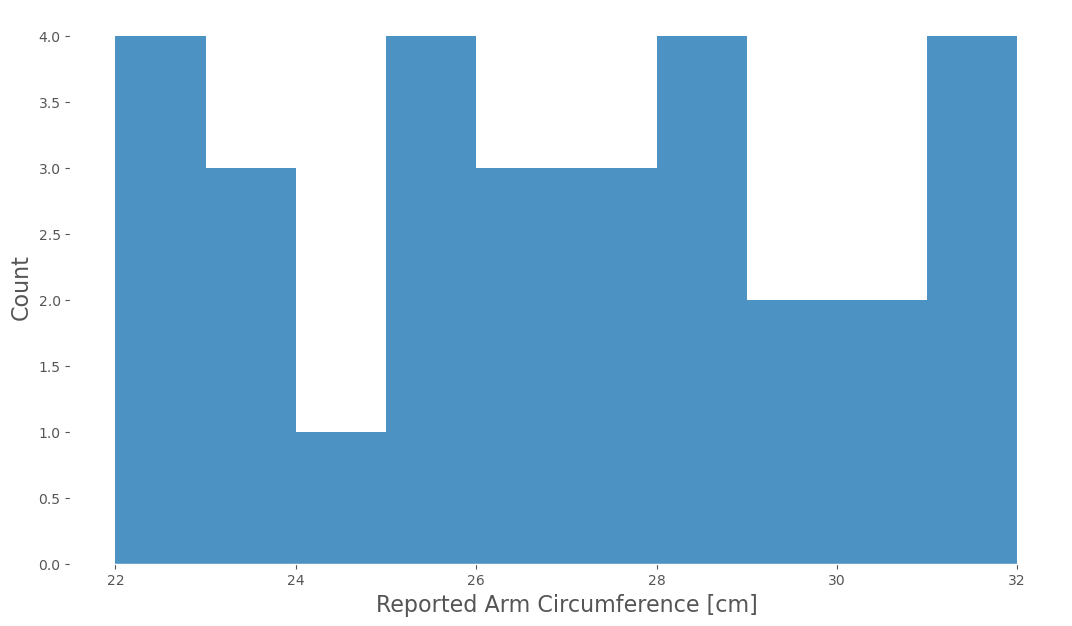

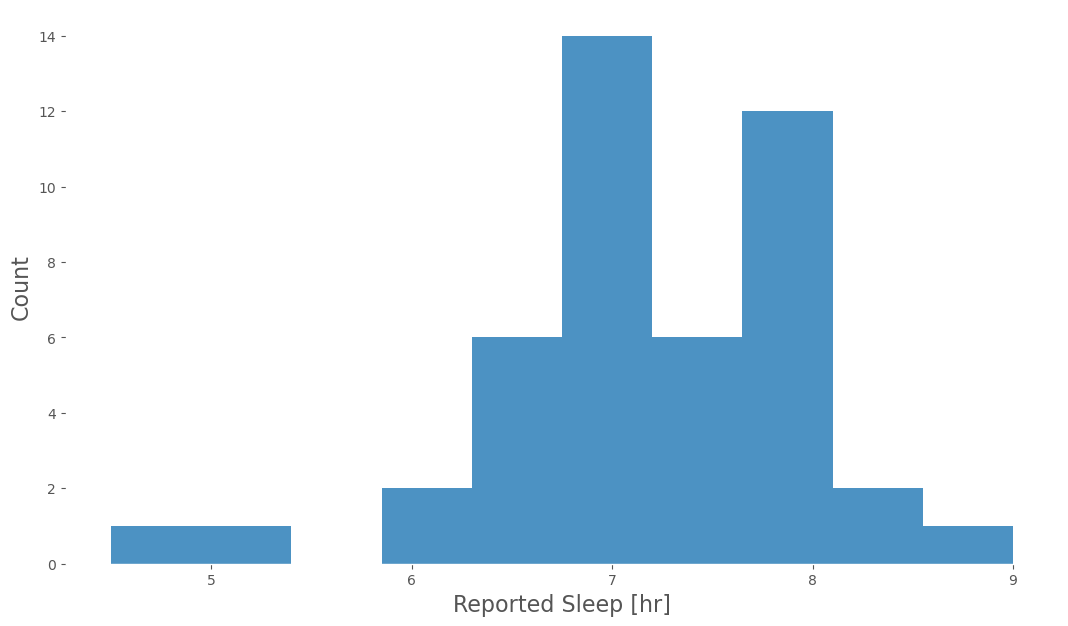

In [56]:
fig, ax = plt.subplots()
ax.hist(form_responses[form_responses["arm size"].notna()]["arm size"],color="tab:blue",alpha=0.8)
ax.set_xlabel("Reported Arm Circumference [cm]")
ax.set_ylabel("Count")

fig, ax = plt.subplots()
ax.hist(form_responses[form_responses["sleep"].notna()]["sleep"],color="tab:blue",alpha=0.8)
ax.set_xlabel("Reported Sleep [hr]")
ax.set_ylabel("Count")

In [97]:
def column_match(df, column, query):
    return df.loc[df[column] == query]

In [98]:
num_male = column_match(form_responses,"sex","male").shape[0]
num_female = column_match(form_responses,"sex","female").shape[0]
print(num_male, num_female, num_female+num_male)
# form_responses.loc[(form_responses["sex"] != "female") & (form_responses["sex"] != "male")]

29 17 46


In [99]:
timestamps = form_responses["timestamp"][form_responses["timestamp"].notna()].sort_values()
time_order = timestamps.index

In [222]:
def plot_column_rewards(col,fit=True,xlabel=None):
    fig = plt.figure()
    vals = form_responses[col][form_responses[col].notna()]
    plt.plot(vals,subject_rewards[vals.index],"k")
    plt.xlabel(xlabel)
    plt.ylabel("Reward")
    if fit == True:
        x = np.linspace(vals.min(),vals.max(),100)
        r = analysis.linear_fit(vals, subject_rewards[vals.index])
        plot.plot_linear_fit(x,r,plt.gca())
        plt.legend()
    return fig

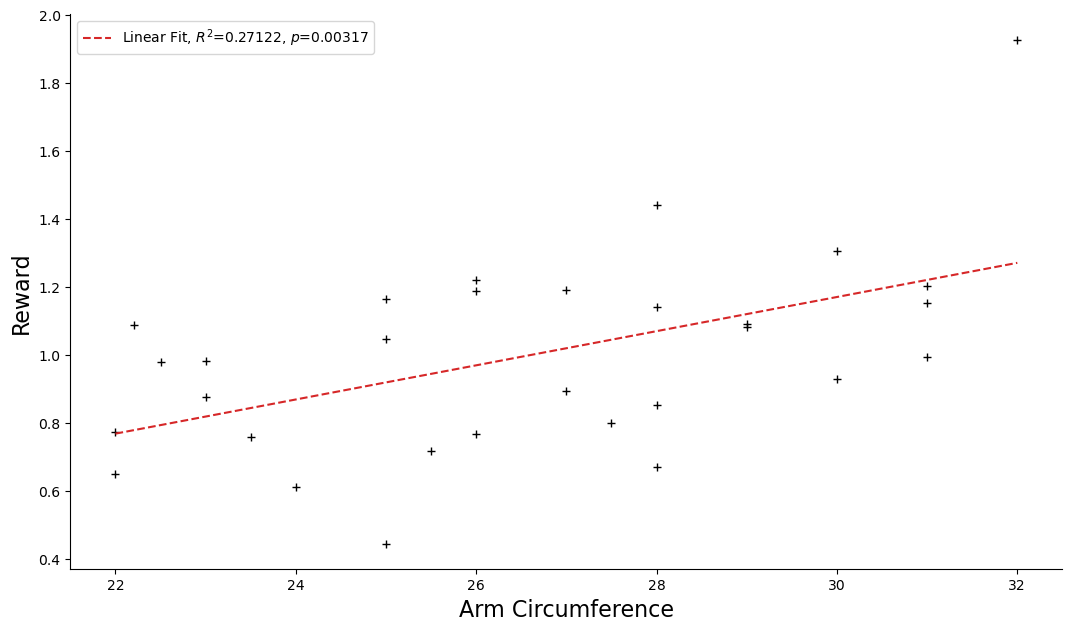

In [225]:
arm_fig = plot_column_rewards("arm size", xlabel="Arm Circumference")

In [226]:
plot.save_figure(arm_fig, "arm_vs_reward", image_path)

Figure saved to /Users/spencer/phd/phd/images/basic_results/form_response/arm_vs_reward.pdf


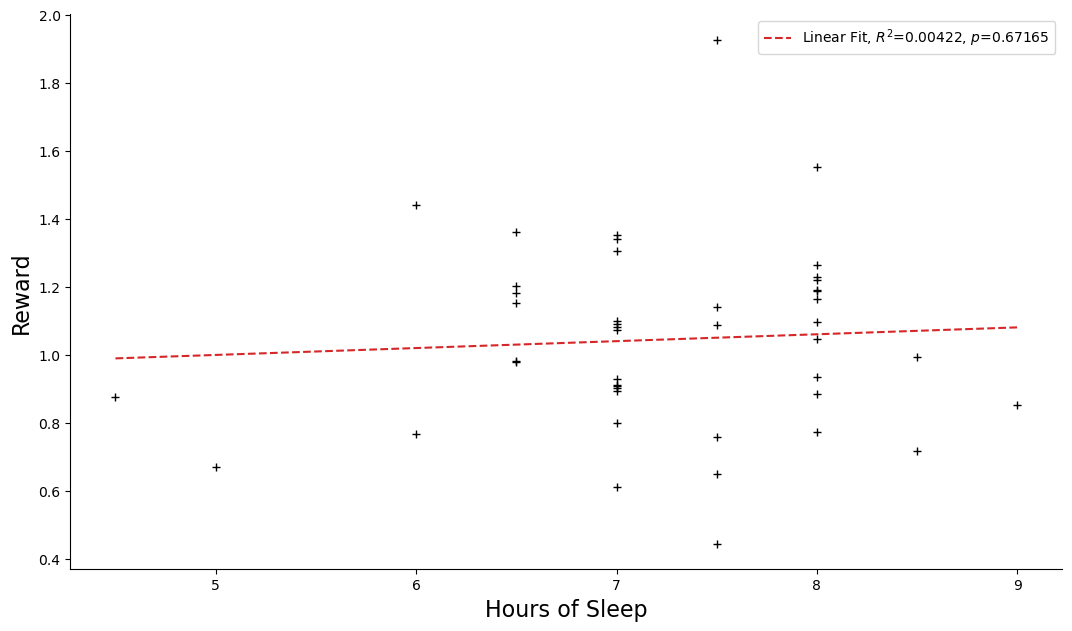

In [227]:
sleep_fig = plot_column_rewards("sleep", xlabel="Hours of Sleep")

In [228]:
sleep_fig = plot.save_figure(sleep_fig, "sleep_vs_reward", image_path)

Figure saved to /Users/spencer/phd/phd/images/basic_results/form_response/sleep_vs_reward.pdf


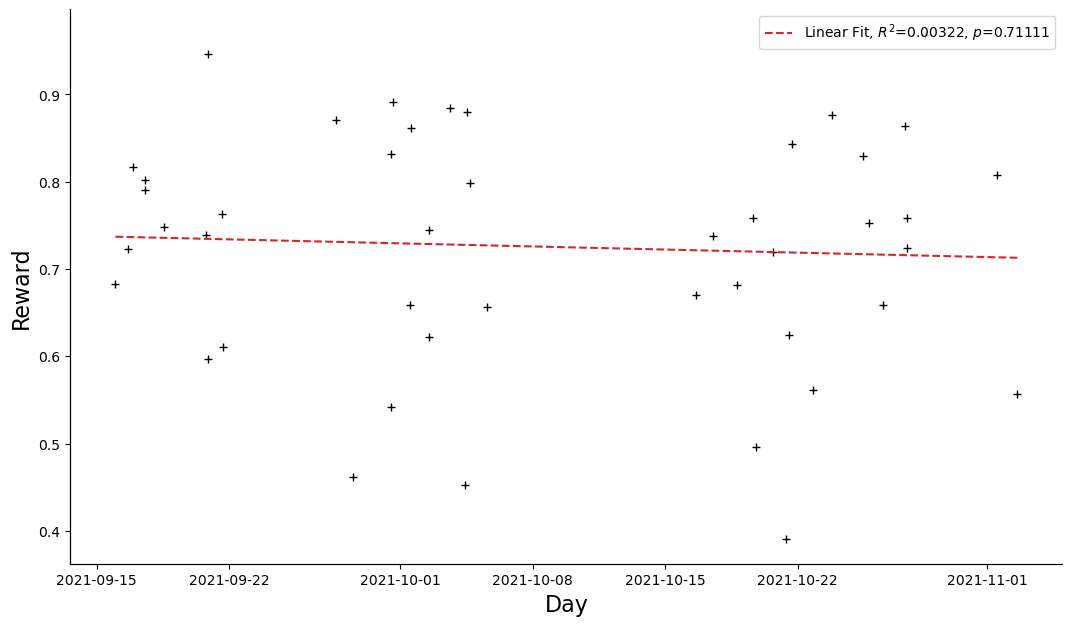

In [218]:
time_fig = plt.figure()
unix_timestamps = np.array([t.timestamp() for t in timestamps])
time_order_hit_fractions = np.array([hit_fractions[i] for i in time_order.to_list()])
plt.xlabel("Day")
plt.ylabel("Reward")

plt.plot(timestamps, time_order_hit_fractions,'k')
plt.twiny()

res = analysis.linear_fit(unix_timestamps,time_order_hit_fractions)
x = analysis.linspace(unix_timestamps)
plot.plot_linear_fit(x, res, plt.gca())
plt.xticks([])
plt.legend()


In [219]:
plot.save_figure(time_fig, "days_vs_reward", image_path)

Figure saved to /Users/spencer/phd/phd/images/basic_results/form_response/days_vs_reward.pdf


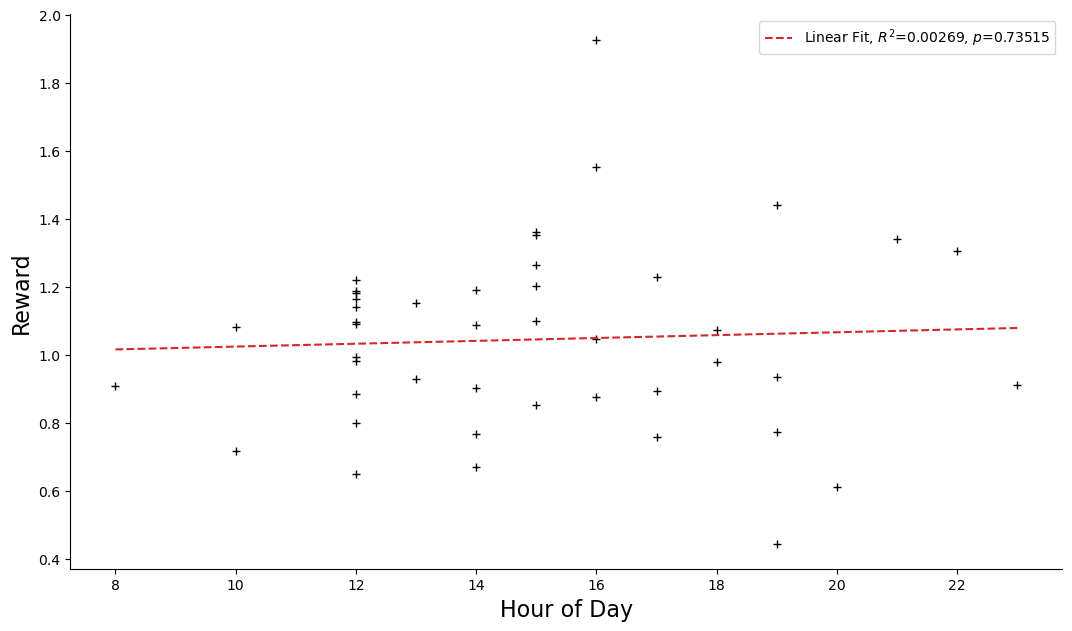

In [220]:
vals = form_responses["timestamp"].dt.hour[form_responses["timestamp"].notna()]
fig = plt.figure()
plt.plot(vals,subject_rewards[vals.index],"k")
plt.xlabel("Hour of Day")
plt.ylabel("Reward")
x = np.linspace(vals.min(),vals.max(),100)
r = analysis.linear_fit(vals, subject_rewards[vals.index])
plot.plot_linear_fit(x,r,plt.gca())
plt.legend()

In [221]:
plot.save_figure(fig, "hour_of_day_vs_reward", image_path)

Figure saved to /Users/spencer/phd/phd/images/basic_results/form_response/hour_of_day_vs_reward.pdf


Text(0.5, 0, 'Hour of Day')

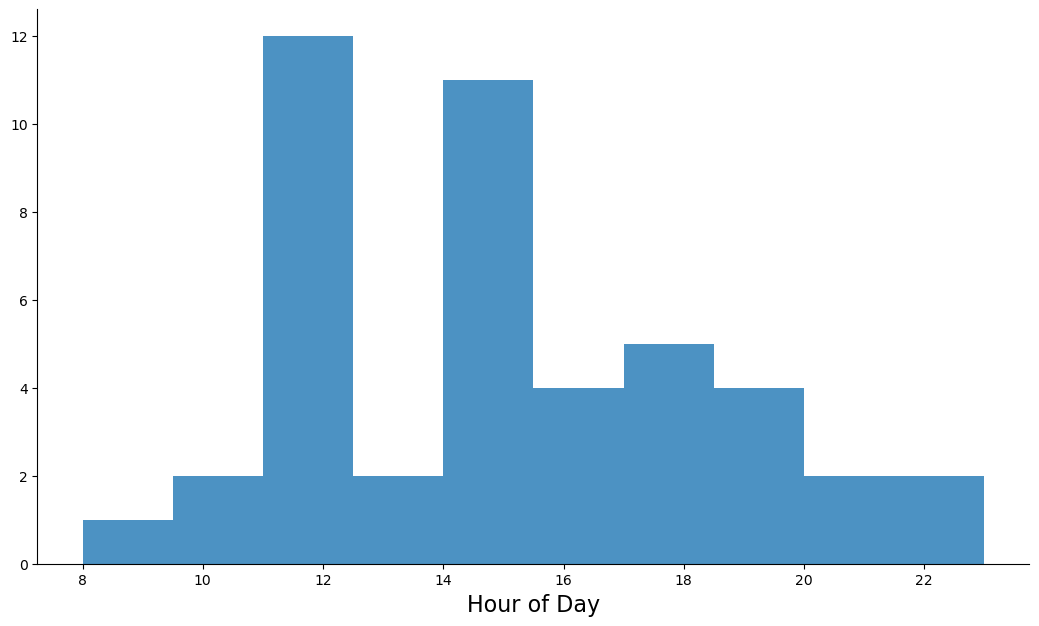

In [111]:
plt.hist(vals,alpha=0.8)
plt.xlabel("Hour of Day")

# plot all the subject descriptor comparison with reward

In [134]:
def compare_segment_rewards(col, queries, labels=None, ttest=True):
    assert len(queries) == 2
    segment_a = subject_rewards[form_responses.loc[form_responses[col] == queries[0]].index]
    plt.plot(np.zeros(segment_a.shape[0]),segment_a,'ko')
    plt.errorbar(0,segment_a.mean(),yerr=segment_a.std(),color='r',marker='o',elinewidth=1,capsize=10)
    
    segment_b = subject_rewards[form_responses.loc[form_responses[col] == queries[1]].index]
    plt.plot(np.ones(segment_b.shape[0]),segment_b,'ko')
    plt.errorbar(1,segment_b.mean(),yerr=segment_b.std(),color='r',marker='o',elinewidth=1,capsize=10)
    plt.ylabel("mean reward")
    plt.xticks(ticks=range(len(queries)),labels=labels)
    if ttest:
        stats = sp.stats.ttest_ind(segment_a,segment_b)
        print("p value: ",round(stats.pvalue*100,3),"%")

In [178]:
def compare_segment_rewards_single_plot(cols, query_list, label_list, colors):
    fig = plt.figure()
    all_ticks = []
    all_labels = []
    for i, (col, queries, labels) in enumerate(zip(cols, query_list, label_list)):
        assert len(queries) == 2

        tick_positions = [i, i+0.5]

        segment_a = subject_rewards[form_responses.loc[form_responses[col] == queries[0]].index]
        segment_b = subject_rewards[form_responses.loc[form_responses[col] == queries[1]].index]

        plt.plot(np.zeros(segment_a.shape[0])+tick_positions[0], segment_a, 'o', color=colors[i], alpha=0.7)
        plt.plot(np.zeros(segment_b.shape[0])+tick_positions[1],segment_b, 'o', color=colors[i], alpha=0.7)
        plt.errorbar(tick_positions[0],segment_a.mean(),yerr=segment_a.std(),color='k',marker='o',elinewidth=1,capsize=10)
        plt.errorbar(tick_positions[1],segment_b.mean(),yerr=segment_b.std(),color='k',marker='o',elinewidth=1,capsize=10)
        
        all_ticks += tick_positions
        all_labels += labels

        stats = sp.stats.ttest_ind(segment_a,segment_b)
        print(f"{labels} p value: ", plot.format_scientific(stats.pvalue))
    plt.xticks(ticks=all_ticks,labels=all_labels,rotation=45,fontsize=14)
    plt.ylabel("Reward")
    return fig

['Female', 'Male'] p value:  2.530e-04
['Sportsperson', 'Non-sportsperson'] p value:  1.895e-01
['Righty', 'Lefty'] p value:  7.038e-01
['Caffeinated', 'Uncaffeinated'] p value:  1.943e-01
['Dexterous', 'Non-dexterous'] p value:  1.629e-01


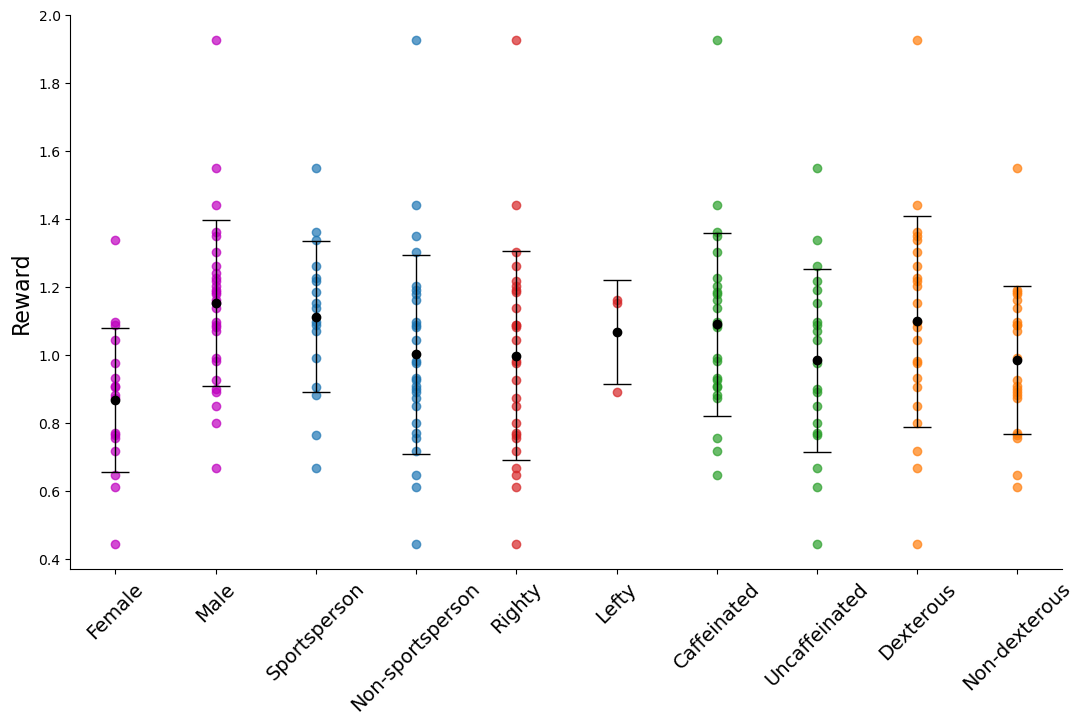

In [179]:
cols = ["sex", "sports", "handedness", "caffeine", "dexterity"]
query_list = [["female","male"],[True,False],["right","left"],[True,False],[True, False]]
label_list = [["Female", "Male"], ["Sportsperson", "Non-sportsperson"], ["Righty", "Lefty"], ["Caffeinated","Uncaffeinated"], ["Dexterous", "Non-dexterous"]]
colors = ["m", "tab:blue", "tab:red", "tab:green", "tab:orange"]
comparison_fig = compare_segment_rewards_single_plot(cols, query_list, label_list, colors)

In [181]:
plot.save_figure(comparison_fig, "compare_subject_groups", image_path)

Figure saved to /Users/spencer/phd/phd/images/basic_results/form_response/compare_subject_groups.pdf


In [182]:
# plt.figure()
# female_hfs = np.array([hit_fractions[i] for i in form_responses[form_responses["sex"] == "female"].index])
# male_hfs = np.array([hit_fractions[i] for i in form_responses[form_responses["sex"] == "male"].index])
# plt.plot(np.zeros(female_hfs.shape[0]),female_hfs,'ko')
# plt.errorbar(0,female_hfs.mean(),yerr=female_hfs.std(),color='r',marker='o',elinewidth=1,capsize=10)
# plt.plot(np.ones(male_hfs.shape[0]),male_hfs,'ko')
# plt.errorbar(1,male_hfs.mean(),yerr=male_hfs.std(),color='r',marker='o',elinewidth=1,capsize=10)
# plt.ylabel("Hit Fraction")
# plt.xticks(ticks=[0,1], labels=["female","male"])
# stats = sp.stats.ttest_ind(female_hfs,male_hfs)
# print("p value: ",round(stats.pvalue*100,3),"%")

# plt.figure()
# compare_segment_rewards("sex",["female","male"],labels=["female", "male"])

# plt.figure()
# compare_segment_rewards("sports",[True,False],labels=["Sportsperson", "Non-sportsperson"])

# plt.figure()
# compare_segment_rewards("handedness",["right","left"],labels=["Righty", "Lefty"])

# plt.figure()
# compare_segment_rewards("caffeine",[True,False],labels=["caffeinated","uncaffeinated"])

# plt.figure()
# compare_segment_rewards("dexterity",[True, False],labels=["dexterous", "non"])